## Este notebook contiene los siguientes pasos de transformación de datos del dataset grande de Airbnb:
- Transformación de las columnas categóricas a través de Ordinal Encoder y OneHot Encoder
- Prueba de varios modelos de Machine Learning
- Comparación de las métricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost
import catboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
print(tf. __version__)

import sys

import warnings
warnings.filterwarnings("ignore")

c:\Users\Selvie\anaconda3\envs\ml_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


2.12.0


## El dataset grande sin outliers (utilizando el método rango intequartil/IQR) SIN hacer la agrupación por cada comunidad autónoma

In [2]:
big_data_no_outliers_cols_3 = pd.read_csv("../data/output_data_1/big_data_no_outliers_cols_3.csv", encoding="utf-8")
big_data_no_outliers_cols_3 = big_data_no_outliers_cols_3.drop("Unnamed: 0", axis=1)
big_data_no_outliers_cols_3

,id,minimum_nights,idealista_rental(EUR/m2/month),ine_num_vacation_rental,calculated_host_listings_count,ine_num_tourists_vacation_rental,reviews_per_month,ine_percent_vacation_rental,idealista_sell(EUR/m2),availability_365,number_of_reviews_ltm,number_of_reviews,price,state,room_type,license,last_review
0,18674,1,14.7,49265,20,63894,0.28,1.28,2328,264,11,33,129,Cataluña,Entire home/apt,HUTB-002062,2022-10-07
1,23197,4,14.7,49265,2,63894,0.45,1.28,2328,255,12,65,195,Cataluña,Entire home/apt,HUTB005057,2022-10-23
2,32711,2,14.7,49265,3,63894,0.60,1.28,2328,276,20,83,73,Cataluña,Entire home/apt,HUTB-001722,2022-12-09
3,34981,5,14.7,49265,1,63894,1.28,1.28,2328,139,30,190,174,Cataluña,Entire home/apt,HUTB-001506,2022-11-19
4,36763,31,14.7,49265,1,63894,0.76,1.28,2328,259,19,104,36,Cataluña,Private room,No License,2022-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90572,785689203850632931,1,9.0,51691,1,89325,0.64,1.64,1656,364,3,7,26,Comunidad Valenciana,Private room,No License,No Review
90573,785971133185009634,1,9.0,51691,2,89325,0.64,1.64,1656,335,3,7,40,Comunidad Valenciana,Private room,No License,No Review
90574,786120918642825480,2,9.0,51691,1,89325,0.64,1.64,1656,365,3,7,45,Comunidad Valenciana,Private room,No License,No Review
90575,786125428040961074,1,9.0,51691,1,89325,0.64,1.64,1656,364,3,7,57,Comunidad Valenciana,Entire home/apt,No License,No Review


In [3]:
big_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                90577 non-null  int64  
 1   minimum_nights                    90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)    90577 non-null  float64
 3   ine_num_vacation_rental           90577 non-null  int64  
 4   calculated_host_listings_count    90577 non-null  int64  
 5   ine_num_tourists_vacation_rental  90577 non-null  int64  
 6   reviews_per_month                 90577 non-null  float64
 7   ine_percent_vacation_rental       90577 non-null  float64
 8   idealista_sell(EUR/m2)            90577 non-null  int64  
 9   availability_365                  90577 non-null  int64  
 10  number_of_reviews_ltm             90577 non-null  int64  
 11  number_of_reviews                 90577 non-null  int64  
 12  pric

### Elige las columnas categóricas

In [4]:
cat_cols = big_data_no_outliers_cols_3.select_dtypes(include="object").columns
cat_cols

Index(['state', 'room_type', 'license', 'last_review'], dtype='object')

### Comprueba valores nulos en columnas categóricas. No los debería haber porque los había tratado en el notebook anterior.

In [5]:
sys.path.insert(0, '../functions')
import data_report as dr


dr.data_report(big_data_no_outliers_cols_3[cat_cols]).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
state,object,0.0,7,0.01
room_type,object,0.0,4,0.0
license,object,0.0,38873,42.92
last_review,object,0.0,2271,2.51


### Comprueba los valores únicos de cada columna categórica para decidir el tipo de encoding

In [6]:
for col in cat_cols:
	print(col, "\n", len(big_data_no_outliers_cols_3[col].unique()), "\n", big_data_no_outliers_cols_3[col].unique())
	print("----------------------------")

state 
 7 
 ['Cataluña' 'País Vasco' 'La Rioja' 'Comunidad de Madrid' 'Andalucía'
 'Islas Baleares' 'Comunidad Valenciana']
----------------------------
room_type 
 4 
 ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
----------------------------
license 
 38873 
 ['HUTB-002062' 'HUTB005057' 'HUTB-001722' ... 'VT44568T' '643133627'
 'VT-41916V']
----------------------------
last_review 
 2271 
 ['2022-10-07' '2022-10-23' '2022-12-09' ... '2020-11-21' '2021-03-05'
 '2020-09-21']
----------------------------


Comentario:
<br><br><b>Ordinal Encoding</b>
<br><br>Les voy a aplicar el Ordinal Encoding a las siguientes columnas porque tienen nivel de importancia. 
- "license" --> le voy a convertir a una columna categórica donde los valores serán "Yes" (tiene licencia) o "No" (no tiene licencia). Una vez sea una columna categórica, le aplicaré el Ordinal Encoding. La escala será del 0 al 1, desde la menos importante hasta la más importante: "No", "Yes".
- "last_review" --> le voy a convertir a una columna categórica donde los valores serán "Yes" (tiene última reseña) o "No" (no tiene última reseña). Una vez sea una columna categórica, le aplicaré el Ordinal Encoding. La escala será del 0 al 1, desde la menos importante hasta la más importante: "No", "Yes".
- "room_type" --> La escala será del 0 al 3, desde la menos importante hasta la más importante: 'Shared room', 'Private room', 'Hotel room', 'Entire home/apt', suponiendo que los alojamientos con estas categorías tienen las mismas carácterísticas (por ej: están ubicados en la misma zona y en un edificio nuevo, etc.).

<b>One Hot Encoding</b>
- "state" --> le voy a aplicar el One Hot Encoding.

## 1) Ordinal Encoding

### Aplica el Ordinal Encoding a las columnas de arriba

In [7]:
cat_cols = list(cat_cols)

In [8]:
cat_cols.append(cat_cols.pop(cat_cols.index('state')))
cat_cols

['room_type', 'license', 'last_review', 'state']

In [9]:
cat_cols_ordinal = cat_cols[:-1]
cat_cols_ordinal

['room_type', 'license', 'last_review']

In [10]:
for col in cat_cols_ordinal:
    print(col, "\n", len(big_data_no_outliers_cols_3[col].unique()), "\n", big_data_no_outliers_cols_3[col].unique())
    print("---------------------")

room_type 
 4 
 ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
---------------------
license 
 38873 
 ['HUTB-002062' 'HUTB005057' 'HUTB-001722' ... 'VT44568T' '643133627'
 'VT-41916V']
---------------------
last_review 
 2271 
 ['2022-10-07' '2022-10-23' '2022-12-09' ... '2020-11-21' '2021-03-05'
 '2020-09-21']
---------------------


In [11]:
# Convierte la siguiente columna a columna categórica
big_data_no_outliers_cols_3['last_review'] = big_data_no_outliers_cols_3['last_review'].apply(lambda x: 'No' if 'No Review' in x else 'Yes')

big_data_no_outliers_cols_3['license'] = big_data_no_outliers_cols_3['license'].apply(lambda x: 'No' if 'No License' in x else 'Yes')

In [12]:
# Ordena la lista de categorías desde la menos importante hasta la más importante. Por defecto, empieza del 0.
ordinal_license = ["No", "Yes"]
ordinal_last_review = ["No", "Yes"]
ordinal_room = ['Shared room', 'Private room', 'Hotel room', 'Entire home/apt']

# Instancia la clase de Ordinal Encoder
ordinal = OrdinalEncoder(categories=[ordinal_license, ordinal_last_review, ordinal_room])

# Ordena la lista de ordinal segun la lista de categorías en la variable "ordinal" de arriba
cat_cols_ordinal = ['license', 'last_review', 'room_type']

# Crea una variable y hay que ponerle un array de 2D o un dataframe
encoded_cols = ordinal.fit_transform(big_data_no_outliers_cols_3[cat_cols_ordinal])

#  Asigna las columnas codificadas al dataframe
big_data_no_outliers_cols_3[cat_cols_ordinal] = encoded_cols

In [13]:
ordinal.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Shared room', 'Private room', 'Hotel room', 'Entire home/apt'],
       dtype=object)]

## 2) One Hot Encoding

In [14]:
cat_cols

['room_type', 'license', 'last_review', 'state']

In [15]:
cat_cols_onehot = [cat_cols[3]]
cat_cols_onehot

['state']

In [16]:
# Instancia la clase de OneHot Encoder
onehot = OneHotEncoder(sparse=False)

# Crea una variable y hay que ponerle un array de 2D o un dataframe
encoded_cols = onehot.fit_transform(big_data_no_outliers_cols_3[cat_cols_onehot])

# Instancia la clase ColumnTransformer
ct = ColumnTransformer([('onehot', onehot, cat_cols_onehot)], remainder='passthrough')

# fitea los datos
ct.fit(big_data_no_outliers_cols_3[cat_cols_onehot])

# transforma los datos and consigue el nuevo nombre de las columas
encoded_data = ct.transform(big_data_no_outliers_cols_3)
feature_names = ct.get_feature_names_out()

#  Asigna las columnas codificadas al dataframe
big_data_no_outliers_cols_3[feature_names] = encoded_cols

In [17]:
onehot.categories_

[array(['Andalucía', 'Cataluña', 'Comunidad Valenciana',
        'Comunidad de Madrid', 'Islas Baleares', 'La Rioja', 'País Vasco'],
       dtype=object)]

In [18]:
cat_cols_onehot_after = list(feature_names)
cat_cols_onehot_after

['onehot__state_Andalucía',
 'onehot__state_Cataluña',
 'onehot__state_Comunidad Valenciana',
 'onehot__state_Comunidad de Madrid',
 'onehot__state_Islas Baleares',
 'onehot__state_La Rioja',
 'onehot__state_País Vasco']

In [19]:
# Quita la columa "state" porque ya tenemos su desglose de OneHot
big_data_no_outliers_cols_3 = big_data_no_outliers_cols_3.drop("state", axis=1)

In [20]:
big_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)      90577 non-null  float64
 3   ine_num_vacation_rental             90577 non-null  int64  
 4   calculated_host_listings_count      90577 non-null  int64  
 5   ine_num_tourists_vacation_rental    90577 non-null  int64  
 6   reviews_per_month                   90577 non-null  float64
 7   ine_percent_vacation_rental         90577 non-null  float64
 8   idealista_sell(EUR/m2)              90577 non-null  int64  
 9   availability_365                    90577 non-null  int64  
 10  number_of_reviews_ltm               90577 non-null  int64  
 11  number_of_reviews                   90577

### Double check

In [21]:
big_data_no_outliers_cols_3.columns

Index(['id', 'minimum_nights', 'idealista_rental(EUR/m2/month)',
       'ine_num_vacation_rental', 'calculated_host_listings_count',
       'ine_num_tourists_vacation_rental', 'reviews_per_month',
       'ine_percent_vacation_rental', 'idealista_sell(EUR/m2)',
       'availability_365', 'number_of_reviews_ltm', 'number_of_reviews',
       'price', 'room_type', 'license', 'last_review',
       'onehot__state_Andalucía', 'onehot__state_Cataluña',
       'onehot__state_Comunidad Valenciana',
       'onehot__state_Comunidad de Madrid', 'onehot__state_Islas Baleares',
       'onehot__state_La Rioja', 'onehot__state_País Vasco'],
      dtype='object')

In [22]:
# double check ordinal
big_data_no_outliers_cols_3[cat_cols_ordinal].head(5)

,license,last_review,room_type
0,1.0,1.0,3.0
1,1.0,1.0,3.0
2,1.0,1.0,3.0
3,1.0,1.0,3.0
4,0.0,1.0,1.0


In [23]:
# double check onehot
big_data_no_outliers_cols_3[big_data_no_outliers_cols_3['onehot__state_Andalucía'] == 1]['onehot__state_Andalucía'].unique()

array([1.])

In [24]:
# double check onehot
big_data_no_outliers_cols_3[big_data_no_outliers_cols_3['onehot__state_Andalucía'] == 0]['onehot__state_Andalucía'].unique()

array([0.])

In [25]:
big_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)      90577 non-null  float64
 3   ine_num_vacation_rental             90577 non-null  int64  
 4   calculated_host_listings_count      90577 non-null  int64  
 5   ine_num_tourists_vacation_rental    90577 non-null  int64  
 6   reviews_per_month                   90577 non-null  float64
 7   ine_percent_vacation_rental         90577 non-null  float64
 8   idealista_sell(EUR/m2)              90577 non-null  int64  
 9   availability_365                    90577 non-null  int64  
 10  number_of_reviews_ltm               90577 non-null  int64  
 11  number_of_reviews                   90577

In [26]:
# Colocamos la columna "price" al último índice
all_selected_cols = list(big_data_no_outliers_cols_3.columns)
all_selected_cols.append(all_selected_cols.pop(all_selected_cols.index('price')))
all_selected_cols

['id',
 'minimum_nights',
 'idealista_rental(EUR/m2/month)',
 'ine_num_vacation_rental',
 'calculated_host_listings_count',
 'ine_num_tourists_vacation_rental',
 'reviews_per_month',
 'ine_percent_vacation_rental',
 'idealista_sell(EUR/m2)',
 'availability_365',
 'number_of_reviews_ltm',
 'number_of_reviews',
 'room_type',
 'license',
 'last_review',
 'onehot__state_Andalucía',
 'onehot__state_Cataluña',
 'onehot__state_Comunidad Valenciana',
 'onehot__state_Comunidad de Madrid',
 'onehot__state_Islas Baleares',
 'onehot__state_La Rioja',
 'onehot__state_País Vasco',
 'price']

In [27]:
big_data_no_outliers_cols_3 = big_data_no_outliers_cols_3[all_selected_cols]
big_data_no_outliers_cols_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)      90577 non-null  float64
 3   ine_num_vacation_rental             90577 non-null  int64  
 4   calculated_host_listings_count      90577 non-null  int64  
 5   ine_num_tourists_vacation_rental    90577 non-null  int64  
 6   reviews_per_month                   90577 non-null  float64
 7   ine_percent_vacation_rental         90577 non-null  float64
 8   idealista_sell(EUR/m2)              90577 non-null  int64  
 9   availability_365                    90577 non-null  int64  
 10  number_of_reviews_ltm               90577 non-null  int64  
 11  number_of_reviews                   90577

In [28]:
# Este dataset ya tiene todas las columnas transformadas a números
# Este dataset contiene datos externos (de Idealista e INE)
big_data_no_outliers_cols_3.to_csv("../data/output_data_5/big_data_no_outliers_cols_3.csv")

In [29]:
# Este dataset SÓLO contiene datos de Airbnb
drop_ext_cols = ['idealista_sell(EUR/m2)', 'idealista_rental(EUR/m2/month)', 'ine_num_vacation_rental', 'ine_num_tourists_vacation_rental',
                 'ine_percent_vacation_rental']

big_data_no_outliers_cols_3_wo_ext = big_data_no_outliers_cols_3.copy()

big_data_no_outliers_cols_3_wo_ext = big_data_no_outliers_cols_3_wo_ext.drop(drop_ext_cols, axis=1)

big_data_no_outliers_cols_3_wo_ext.to_csv("../data/output_data_5/without_external_data/big_data_no_outliers_cols_3_wo_ext.csv")

big_data_no_outliers_cols_3_wo_ext.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   calculated_host_listings_count      90577 non-null  int64  
 3   reviews_per_month                   90577 non-null  float64
 4   availability_365                    90577 non-null  int64  
 5   number_of_reviews_ltm               90577 non-null  int64  
 6   number_of_reviews                   90577 non-null  int64  
 7   room_type                           90577 non-null  float64
 8   license                             90577 non-null  float64
 9   last_review                         90577 non-null  float64
 10  onehot__state_Andalucía             90577 non-null  float64
 11  onehot__state_Cataluña              90577

### Correlación entre los features y el target

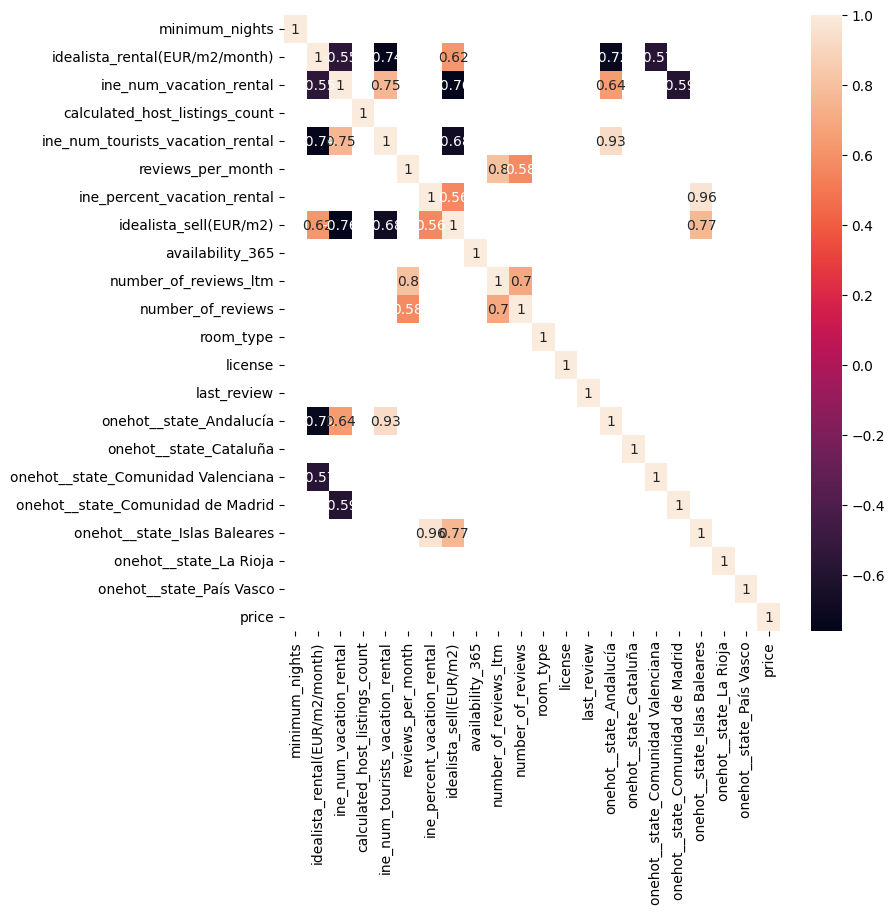

In [30]:
sys.path.insert(0, '../functions')
import find_correlation as fc

plt.figure(figsize=(8, 8))
sns.heatmap(fc.func(big_data_no_outliers_cols_3.iloc[:, 1:].corr(), 0.5, "both", drop=True), annot=True);

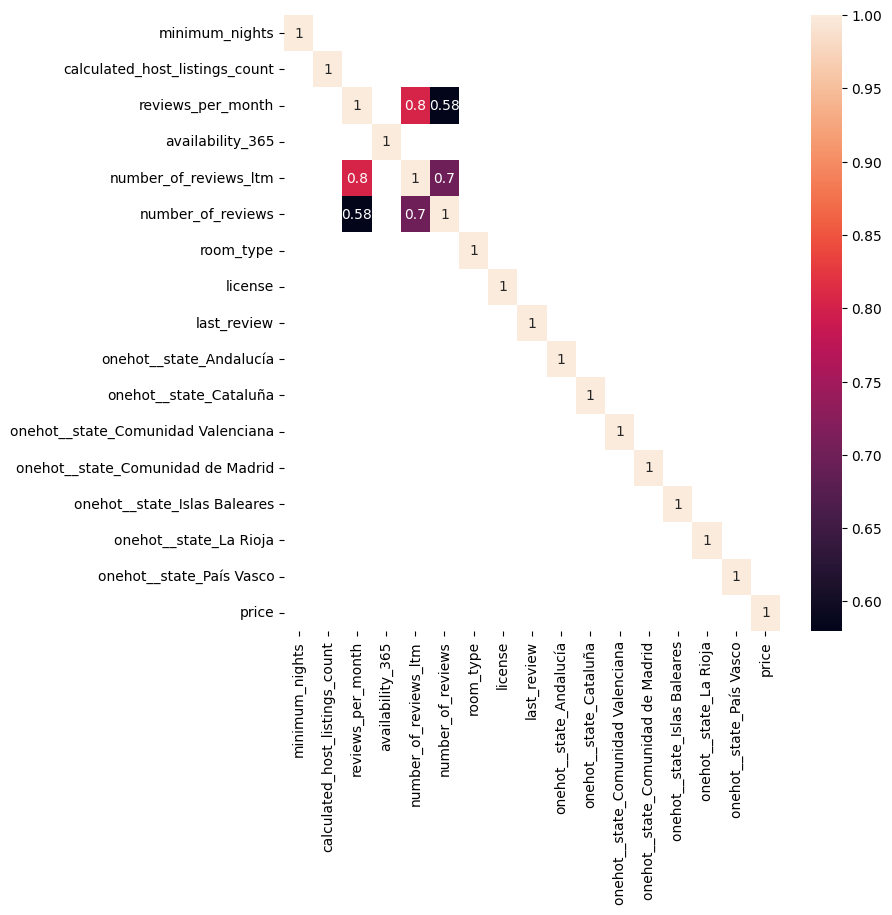

In [31]:
plt.figure(figsize=(8, 8))
sns.heatmap(fc.func(big_data_no_outliers_cols_3_wo_ext.iloc[:, 1:].corr(), 0.5, "both", drop=True), annot=True);

## Machine Learning

### 1) Prueba el dataset "big_data_no_outliers_cols_3" que:
- tiene precios de IQR SIN agrupar por cada comunidad autónoma
- contiene datos externos (de Idealista e INE)

### Determina los features(X) y el target(y)

In [32]:
big_data_no_outliers_cols_3.columns

Index(['id', 'minimum_nights', 'idealista_rental(EUR/m2/month)',
       'ine_num_vacation_rental', 'calculated_host_listings_count',
       'ine_num_tourists_vacation_rental', 'reviews_per_month',
       'ine_percent_vacation_rental', 'idealista_sell(EUR/m2)',
       'availability_365', 'number_of_reviews_ltm', 'number_of_reviews',
       'room_type', 'license', 'last_review', 'onehot__state_Andalucía',
       'onehot__state_Cataluña', 'onehot__state_Comunidad Valenciana',
       'onehot__state_Comunidad de Madrid', 'onehot__state_Islas Baleares',
       'onehot__state_La Rioja', 'onehot__state_País Vasco', 'price'],
      dtype='object')

In [33]:
X = big_data_no_outliers_cols_3.iloc[:, 1:-1]
y = big_data_no_outliers_cols_3["price"]

### Divide el dataset en train y test

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72461, 21)
(72461,)
(18116, 21)
(18116,)


### Escala los datos de X

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[-0.18053767,  0.58061087,  0.54004307, ..., -0.47647613,
        -0.00371493, -0.24898852],
       [ 0.03158768,  0.48615053, -0.5840205 , ...,  2.09874104,
        -0.00371493, -0.24898852],
       [-0.1381126 ,  0.48615053, -0.5840205 , ...,  2.09874104,
        -0.00371493, -0.24898852],
       ...,
       [-0.05326246,  0.48615053, -0.5840205 , ...,  2.09874104,
        -0.00371493, -0.24898852],
       [-0.22296274,  0.58061087,  0.54004307, ..., -0.47647613,
        -0.00371493, -0.24898852],
       [-0.18053767,  0.58061087,  0.54004307, ..., -0.47647613,
        -0.00371493, -0.24898852]])

In [38]:
X_test_scaled

array([[-2.22962741e-01,  4.86150530e-01, -5.84020504e-01, ...,
         2.09874104e+00, -3.71493171e-03, -2.48988515e-01],
       [-1.38112600e-01,  4.86150530e-01, -5.84020504e-01, ...,
         2.09874104e+00, -3.71493171e-03, -2.48988515e-01],
       [-2.22962741e-01,  5.80610872e-01,  5.40043071e-01, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01],
       ...,
       [-9.56875297e-02, -1.78089767e+00,  1.59487359e+00, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01],
       [-1.80537670e-01, -4.11222716e-01, -1.71405157e+00, ...,
        -4.76476126e-01, -3.71493171e-03,  4.01624950e+00],
       [-1.80537670e-01,  5.80610872e-01,  5.40043071e-01, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01]])

### Crea varios modelos y comparalos

Ejecuta con el bucle "for" utilizando los hiperparámetros por defecto de cada modelo

In [41]:
sys.path.insert(0, '../functions')
import run_models as mod


mod.run_models(X_train_scaled, X_test_scaled, y_train, y_test, "../data/output_data_5/metrics_big_data_no_outliers_cols_3.csv")

Running RandomForest model...
Running AdaBoost model...
Running GradientBoost model...
Running XGBoost model...
Running CatBoost model...
Learning rate set to 0.080552
0:	learn: 69.4790798	total: 146ms	remaining: 2m 25s
1:	learn: 68.1393077	total: 153ms	remaining: 1m 16s
2:	learn: 67.0357302	total: 161ms	remaining: 53.6s
3:	learn: 65.9979270	total: 168ms	remaining: 41.8s
4:	learn: 65.1464610	total: 177ms	remaining: 35.2s
5:	learn: 64.3891771	total: 184ms	remaining: 30.4s
6:	learn: 63.7060283	total: 191ms	remaining: 27.1s
7:	learn: 63.1178257	total: 199ms	remaining: 24.6s
8:	learn: 62.6089615	total: 208ms	remaining: 22.9s
9:	learn: 62.1314960	total: 214ms	remaining: 21.2s
10:	learn: 61.7426152	total: 221ms	remaining: 19.9s
11:	learn: 61.3912329	total: 227ms	remaining: 18.7s
12:	learn: 61.0805413	total: 233ms	remaining: 17.7s
13:	learn: 60.8103089	total: 240ms	remaining: 16.9s
14:	learn: 60.5672935	total: 246ms	remaining: 16.2s
15:	learn: 60.3515635	total: 253ms	remaining: 15.6s
16:	lear

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,3101.822470,55.694007,40.526673,0.424958,0.377639
1,AdaBoost,4046.089147,63.608876,52.428310,0.676860,0.188178
2,GradientBoost,3331.193155,57.716489,43.144300,0.465402,0.331618
3,XGBoost,3051.568157,55.241001,40.799264,0.428739,0.387723
4,CatBoost,3045.450034,55.185596,40.748345,0.428533,0.388950
5,KNN,3585.870923,59.882142,43.543354,0.450011,0.280518
6,Voting,3055.743169,55.278777,41.780645,0.461062,0.386885


### 2) Prueba con el dataset "big_data_no_outliers_cols_3_wo_ext" que tiene:
- tiene precios de IQR SIN agrupar por cada comunidad autónoma
- SÓLO contiene datos de Airbnb

### Determina los features(X) y el target(y)

In [42]:
big_data_no_outliers_cols_3_wo_ext.columns

Index(['id', 'minimum_nights', 'calculated_host_listings_count',
       'reviews_per_month', 'availability_365', 'number_of_reviews_ltm',
       'number_of_reviews', 'room_type', 'license', 'last_review',
       'onehot__state_Andalucía', 'onehot__state_Cataluña',
       'onehot__state_Comunidad Valenciana',
       'onehot__state_Comunidad de Madrid', 'onehot__state_Islas Baleares',
       'onehot__state_La Rioja', 'onehot__state_País Vasco', 'price'],
      dtype='object')

In [43]:
X = big_data_no_outliers_cols_3_wo_ext.iloc[:, 1:-1]
y = big_data_no_outliers_cols_3_wo_ext["price"]

### Divide el dataset en train y test

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=42)


In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72461, 16)
(72461,)
(18116, 16)
(18116,)


### Escala los datos de X

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.18053767, -0.35296433, -0.7895569 , ..., -0.47647613,
        -0.00371493, -0.24898852],
       [ 0.03158768, -0.32686906, -0.52667232, ...,  2.09874104,
        -0.00371493, -0.24898852],
       [-0.1381126 , -0.36601197, -0.42720248, ...,  2.09874104,
        -0.00371493, -0.24898852],
       ...,
       [-0.05326246,  1.42151435, -0.68298207, ...,  2.09874104,
        -0.00371493, -0.24898852],
       [-0.22296274, -0.22248796,  0.55328595, ..., -0.47647613,
        -0.00371493, -0.24898852],
       [-0.18053767,  1.17360924, -0.725612  , ..., -0.47647613,
        -0.00371493, -0.24898852]])

In [48]:
X_test_scaled

array([[-2.22962741e-01,  1.83903875e+00, -7.96661889e-01, ...,
         2.09874104e+00, -3.71493171e-03, -2.48988515e-01],
       [-1.38112600e-01, -3.66011968e-01, -6.04827196e-01, ...,
         2.09874104e+00, -3.71493171e-03, -2.48988515e-01],
       [-2.22962741e-01, -3.26869056e-01, -7.61136946e-01, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01],
       ...,
       [-9.56875297e-02, -3.66011968e-01,  7.23805678e-01, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01],
       [-1.80537670e-01, -3.66011968e-01,  1.98036519e-01, ...,
        -4.76476126e-01, -3.71493171e-03,  4.01624950e+00],
       [-1.80537670e-01,  8.34370669e-01, -5.19567332e-01, ...,
        -4.76476126e-01, -3.71493171e-03, -2.48988515e-01]])

### Crea varios modelos y comparalos
Ejecuta con el bucle "for" utilizando los hiperparámetros por defecto de cada modelo

In [49]:
sys.path.insert(0, '../functions')
import run_models as mod


mod.run_models(X_train_scaled, X_test_scaled, y_train, y_test, "../data/output_data_5/without_external_data/metrics_big_data_no_outliers_cols_3_wo_ext.csv")


Running RandomForest model...
Running AdaBoost model...
Running GradientBoost model...
Running XGBoost model...
Running CatBoost model...
Learning rate set to 0.080552
0:	learn: 69.4720631	total: 7.54ms	remaining: 7.53s
1:	learn: 68.1593124	total: 16.3ms	remaining: 8.15s
2:	learn: 67.0151185	total: 22.8ms	remaining: 7.57s
3:	learn: 65.9957729	total: 32.7ms	remaining: 8.13s
4:	learn: 65.1288324	total: 40.1ms	remaining: 7.98s
5:	learn: 64.3672489	total: 48.5ms	remaining: 8.03s
6:	learn: 63.7163824	total: 55.5ms	remaining: 7.88s
7:	learn: 63.1345159	total: 63.5ms	remaining: 7.87s
8:	learn: 62.6265349	total: 70ms	remaining: 7.71s
9:	learn: 62.1750446	total: 77.8ms	remaining: 7.7s
10:	learn: 61.7953620	total: 83.1ms	remaining: 7.47s
11:	learn: 61.4674906	total: 88.8ms	remaining: 7.31s
12:	learn: 61.1555317	total: 95.5ms	remaining: 7.25s
13:	learn: 60.8978028	total: 101ms	remaining: 7.12s
14:	learn: 60.6761964	total: 108ms	remaining: 7.1s
15:	learn: 60.4709058	total: 115ms	remaining: 7.06s
1

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,3111.631272,55.781998,40.557732,0.425054,0.375671
1,AdaBoost,4128.987418,64.257197,53.439040,0.695783,0.171545
2,GradientBoost,3344.993474,57.835919,43.288812,0.467610,0.328849
3,XGBoost,3038.867012,55.125920,40.607854,0.426325,0.390271
4,CatBoost,3036.368899,55.103257,40.711864,0.428597,0.390772
5,KNN,3584.662340,59.872050,43.524862,0.449616,0.280761
6,Voting,3058.994847,55.308181,41.871080,0.463432,0.386232


Comentario:
- Con estos dataset, se ve que el rendimiento de todos los modelos se ha empeorado respecto a los datasets del notebook anterior.